<a href="https://colab.research.google.com/github/Akataruka/MNIST_dataset_prediction/blob/main/MNIST_dataset_task_2_IIITH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#importing the dependency modules
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#get the shapes of the different train and test samples
print("train images shape: ",train_images.shape)
print("train labels shape: ",test_images.shape)
print("test images shape: ", train_labels.shape)
print("test labels shape: ",test_labels.shape)

train images shape:  (60000, 28, 28)
train labels shape:  (10000, 28, 28)
test images shape:  (60000,)
test labels shape:  (10000,)


In [4]:
# Normalize the data

#Reshape the data to be able effectively distinguish a single image (28*28*1)
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

#The values of BW image is from (0-255) we normalise the value sin teh range (0-1)
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# val_images = train_images[-6000:]
# val_labels = train_labels[-6000:]

# train_images = train_images[:-6000]
# train_labels = train_labels[:-6000]

In [6]:
#get the shapes of the different train and test samples
print("train images shape: ",train_images.shape)
print("train labels shape: ", train_labels.shape)
print("test images shape: ",test_images.shape)
print("test labels shape: ",test_labels.shape)
# print("val images shape: ",val_images.shape)
# print("val lables shape: ",val_labels.shape)

train images shape:  (60000, 28, 28, 1)
train labels shape:  (60000, 10)
test images shape:  (10000, 28, 28, 1)
test labels shape:  (10000, 10)


#Creating an overfitting model
Main points to be kept in mind are
- Overfitting model is a model that performs good in train dataset but gives poor results  test dataset as the model get overfitted to the train data values
- we can get the model to over fit the dataset by training it exclusively on train dataset that is training it with too many parameters
- using too many epochs to train teh model and using small batches if the dataset to train the model can cause overfitting of teh model to teh train dataset


In [41]:
# Define the overfitting CNN model
overfit_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Assuming input shape of 28x28x1
    # layers.Dense(4096,activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')  # No activation for logits output
])
overfit_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 2048)                │       1,607,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,405,914 (16.81 MB)

 Trainable params: 4,405,914 (16.81 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile the overfitting model
overfit_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [43]:

# overfit_history = overfit_model.fit(train_images, train_labels, epochs=100,validation_data=(val_images, val_labels))
overfit_history = overfit_model.fit(train_images,train_labels,epochs=100,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8384 - loss: 0.5286 - val_accuracy: 0.9639 - val_loss: 0.1376
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9653 - loss: 0.1361 - val_accuracy: 0.9740 - val_loss: 0.0997
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9757 - loss: 0.0954 - val_accuracy: 0.9745 - val_loss: 0.1151
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0783 - val_accuracy: 0.9699 - val_loss: 0.1125
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0708 - val_accuracy: 0.9729 - val_loss: 0.1195
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9866 - loss: 0.0552 - val_accuracy: 0.9727 - val_loss: 0.1573
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0506 - val_accuracy: 0.9736 - val_loss: 0.1285
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9887 - loss

In [44]:
overfit_model.evaluate(test_images, test_labels)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.6818


0.9797999858856201

In [45]:
# Evaluate the overfitting model
overfit_loss, overfit_accuracy = overfit_model.evaluate(test_images, test_labels)
print("Overfitting model - Loss: {:.4f}, Accuracy: {:.4f}".format(overfit_loss, overfit_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.6818
Overfitting model - Loss: 0.4623, Accuracy: 0.9798


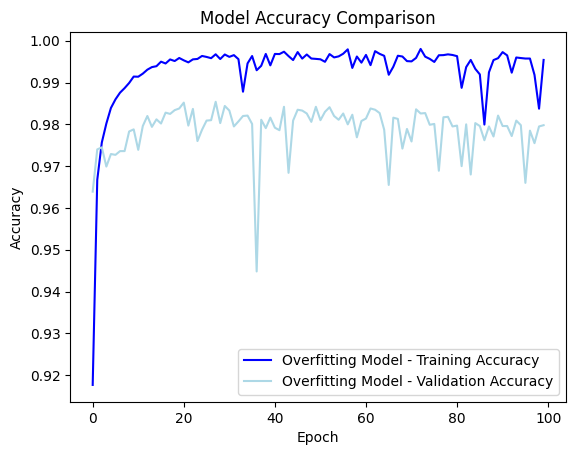

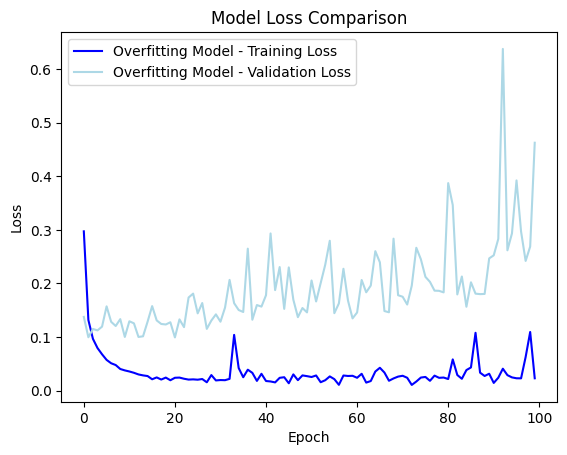

In [47]:
   #  Plot training history
plt.plot(overfit_history.history['accuracy'], label='Overfitting Model - Training Accuracy', color='blue')
plt.plot(overfit_history.history['val_accuracy'], label='Overfitting Model - Validation Accuracy', color='lightblue')
# plt.plot(regularized_history.history['accuracy'], label='Regularized Model - Training Accuracy', color='red')
# plt.plot(regularized_history.history['val_accuracy'], label='Regularized Model - Validation Accuracy', color='pink')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(overfit_history.history['loss'], label='Overfitting Model - Training Loss', color='blue')
plt.plot(overfit_history.history['val_loss'], label='Overfitting Model - Validation Loss', color='lightblue')
# plt.plot(regularized_history.history['loss'], label='Regularized Model - Training Loss', color='red')
# plt.plot(regularized_history.history['val_loss'], label='Regularized Model - Validation Loss', color='pink')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
# Regularized CNN model
regularized_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Assuming input shape of 28x28x1

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    # Dense layer with L2 regularization and batch normalization
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),

    # Output layer
    layers.Dense(10, activation='softmax')  # Using softmax for multi-class classification
])

regularized_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 2048)                │       1,607,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,405,914 (16.81 MB)

 Trainable params: 4,405,914 (16.81 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Compile the regularized model
regularized_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [61]:
# Fit the regularized model
regularized_history = regularized_model.fit(train_images,train_labels,epochs=100,batch_size=64,validation_data=(test_images,test_labels))

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3690 - loss: 2.6127 - val_accuracy: 0.8383 - val_loss: 0.8287
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8266 - loss: 0.9201 - val_accuracy: 0.9479 - val_loss: 0.5504
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9148 - loss: 0.6781 - val_accuracy: 0.9519 - val_loss: 0.4946
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9311 - loss: 0.5945 - val_accuracy: 0.9592 - val_loss: 0.4661
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9400 - loss: 0.5380 - val_accuracy: 0.9506 - val_loss: 0.4948
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9402 - loss: 0.5372 - val_accuracy: 0.9597 - val_loss: 0.4421
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9470 - loss: 0.5030 - val_accuracy: 0.9606 - val_loss: 0.4520
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9471 - loss: 0.4982 - val_ac

In [62]:
# Evaluate the overfitting model
overfit_loss, overfit_accuracy = overfit_model.evaluate(test_images, test_labels)
print("Overfitting model - Loss: {:.4f}, Accuracy: {:.4f}".format(overfit_loss, overfit_accuracy))

# Evaluate the regularized model
regularized_loss, regularized_accuracy = regularized_model.evaluate(test_images, test_labels)
print("Regularized model - Loss: {:.4f}, Accuracy: {:.4f}".format(regularized_loss, regularized_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.6818
Overfitting model - Loss: 0.4623, Accuracy: 0.9798
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.3847
Regularized model - Loss: 0.3664, Accuracy: 0.9698


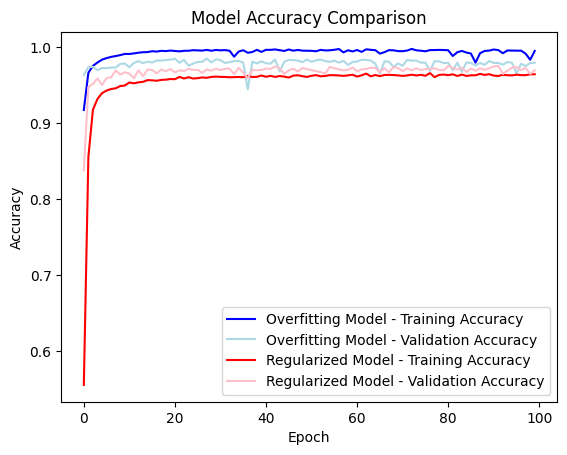

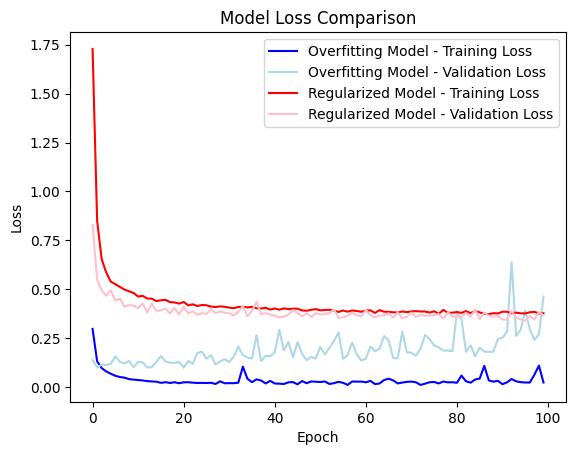

In [63]:
#  Plot training history
plt.plot(overfit_history.history['accuracy'], label='Overfitting Model - Training Accuracy', color='blue')
plt.plot(overfit_history.history['val_accuracy'], label='Overfitting Model - Validation Accuracy', color='lightblue')
plt.plot(regularized_history.history['accuracy'], label='Regularized Model - Training Accuracy', color='red')
plt.plot(regularized_history.history['val_accuracy'], label='Regularized Model - Validation Accuracy', color='pink')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(overfit_history.history['loss'], label='Overfitting Model - Training Loss', color='blue')
plt.plot(overfit_history.history['val_loss'], label='Overfitting Model - Validation Loss', color='lightblue')
plt.plot(regularized_history.history['loss'], label='Regularized Model - Training Loss', color='red')
plt.plot(regularized_history.history['val_loss'], label='Regularized Model - Validation Loss', color='pink')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Regularized Model
- we can overcome the overfitting issue in models with too many parameters by addign dropout effect to the layers (dropout method uses only some percentage of neurons at a particulat instance to trian the model)
- we can alos use weight decay method to supress the change due to the error backpropagation to the far away layers
- we can use smaller batches of dataset at a time to train the model to regularsise the model